# 発表に向けて情報をちょちょいするバージョン

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt
import os
os.environ["DJANGO_SETTINGS_MODULE"] = "analyzer.settings"
import sys
import django
django.setup()

In [2]:
import datetime
from datetime import timedelta

In [3]:
import pickle

In [4]:
# pickleからデータを開く
with open('kampo_list.pickle', mode='rb') as f:
    keme = pickle.load(f)
# group.name, user_count, start_day, user.username, steps, distance, kampo, step1, step2, ... , step10

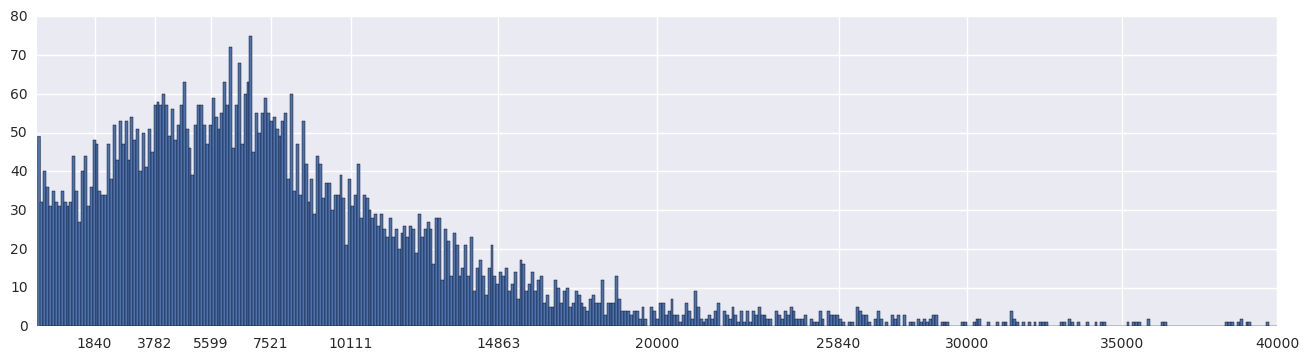

In [159]:
hoge = keme[:, 7:17].copy()
rows = np.array([])
for i in range(len(hoge)):
    if sum(hoge[i]) == 0.0:
        rows = np.append( rows, i )
hoge = np.delete( hoge, rows, 0 )
hoge.shape = len(hoge)*10,

# plt.figure(figsize=(16,6))
# plt.hist(hoge, bins=1000)
# plt.ylim(0, 210)
# plt.xlim(0, 38000)
# plt.xticks([1840, 3782, 5599, 7521, 10111, 14863, 20000, 25840, 30000, 35000, 40000], [1840, 3782, 5599, 7521, 10111, 14863, 20000, 25840, 30000, 35000, 40000])
# # plt.xticks([1840, 3782, 5000, 5599, 7521, 10000, 10111, 14863, 15000, 25000, 25840, 30000, 35000, 40000], [1840, 3782, 5000, 5599, 7521, 10000, 10111, 14863, 15000, 25000, 25840, 30000, 35000, 40000])
# plt.show()

hoge = hoge[hoge != 0.0]
plt.figure(figsize=(16,4))
plt.hist(hoge, bins=1000)
# plt.ylim(0, 210)
plt.xlim(0, 38000)
plt.xticks([1840, 3782, 5599, 7521, 10111, 14863, 20000, 25840, 30000, 35000, 40000], [1840, 3782, 5599, 7521, 10111, 14863, 20000, 25840, 30000, 35000, 40000])
# plt.xticks([1840, 3782, 5000, 5599, 7521, 10000, 10111, 14863, 15000, 25000, 25840, 30000, 35000, 40000], [1840, 3782, 5000, 5599, 7521, 10000, 10111, 14863, 15000, 25000, 25840, 30000, 35000, 40000])
# plt.show()
plt.savefig("graph.pdf")

In [6]:
print max(hoge), max(hoge)*0.6

93679.0 56207.4


In [7]:
mikan_data = keme[np.where( keme[:, 6] == False ), 7:17].copy()
kampo_data = keme[np.where( keme[:, 6] == True ), 7:17].copy()
mikan_data = mikan_data[0, ]
kampo_data = kampo_data[0, ]

In [8]:
import scipy
from scipy import cluster

In [9]:
sep_data = keme[np.where( keme[:, 2] == datetime.date(2015, 9, 11) ), 7:17].copy()
sep_data = sep_data[0, ]

oct_data = keme[np.where( keme[:, 2] == datetime.date(2015, 10, 6) ), 7:17].copy()
oct_data = oct_data[0, ]

nov_data = keme[np.where( keme[:, 2] == datetime.date(2015, 11, 1) ), 7:17].copy()
nov_data = nov_data[0, ]

In [10]:
# それぞれ ゼロばっかりの記録の人を除く
print sep_data.shape, oct_data.shape, nov_data.shape

rows = np.array([])
for i in range(len(sep_data)):
    if sum(sep_data[i]) == 0.0:
        rows = np.append( rows, i )
sep_data = np.delete( sep_data, rows, 0 )

rows = np.array([])
for i in range(len(oct_data)):
    if sum(oct_data[i]) == 0.0:
        rows = np.append( rows, i )
oct_data = np.delete( oct_data, rows, 0 )

rows = np.array([])
for i in range(len(nov_data)):
    if sum(nov_data[i]) == 0.0:
        rows = np.append( rows, i )
nov_data = np.delete( nov_data, rows, 0 )

print sep_data.shape, oct_data.shape, nov_data.shape

(189, 10) (388, 10) (460, 10)
(127, 10) (259, 10) (318, 10)


# ベクトル量子化してみよう！

# あきらめて杉山先生の量子化結果をもらう

In [11]:
codebook = np.array([ 18064.2734375, 6483.97900391, 8558.92480469, 2849.14038086, 
                     11663.4296875, 832.01855469, 33613.1328125, 4715.02880859])
codebook = np.sort(codebook)
print codebook

[   832.01855469   2849.14038086   4715.02880859   6483.97900391
   8558.92480469  11663.4296875   18064.2734375   33613.1328125 ]


In [12]:
# codebookを参照して月ごとのデータを離散化
# 各データをセントロイドに分類する
# ----------9月のデータ-------------#
data = sep_data.copy()
data = data.astype(np.float32)
data.shape = 1270,

sep_code, dist = scipy.cluster.vq.vq(data, codebook)

# print "portion of each code: "
# for i in xrange(8):
#     print "num of [%d]: " % i, np.count_nonzero((sep_code == i))
sep_code.shape = (127, 10)


# ----------10月のデータ-------------#
data = oct_data.copy()
data = data.astype(np.float32)
data.shape = 2590,

oct_code, dist = scipy.cluster.vq.vq(data, codebook)

# print "portion of each code: "
# for i in xrange(8):
#     print "num of [%d]: " % i, np.count_nonzero((oct_code == i))
oct_code.shape = (259, 10)


# ----------11月のデータ-------------#
data = nov_data.copy()
data = data.astype(np.float32)
data.shape = 3180,

nov_code, dist = scipy.cluster.vq.vq(data, codebook)

# print "portion of each code: "
# for i in xrange(8):
#     print "num of [%d]: " % i, np.count_nonzero((nov_code == i))
nov_code.shape = (318, 10)

In [13]:
sep_data = sep_code.copy()
oct_data = oct_code.copy()
nov_data = nov_code.copy()

In [14]:
import pandas
import seaborn

In [15]:
X = np.vstack([ sep_data, oct_data, nov_data ])

In [152]:
import matplotlib.pyplot as plt
# color = ['crimson', 'coral', 'gold', 'mediumaquamarine', 'lightskyblue', 'dodgerblue', 'navy', 'orchid']
color = ['gold', 'khaki', 'lemonchiffon', 'plum', 'thistle', 'lightpink', 'coral', 'crimson']

In [17]:
from nxpd import draw, nxpdParams

In [18]:
PLUS = np.array([ [False, True, True, True, True, True, True, True],
                  [False, False, True, True, True, True, True, True],
                  [False, False, False, True, True, True, True, True],
                  [False, False, False, False, True, True, True, True],
                  [False, False, False, False, False, True, True, True],
                  [False, False, False, False, False, False, True, True],
                  [False, False, False, False, False, False, False, True],
                  [False, False, False, False, False, False, False, False] ])

MINUS = np.array([ [False, False, False, False, False, False, False, False],
                   [True, False, False, False, False, False, False, False],
                   [True, True, False, False, False, False, False, False],
                   [True, True, True, False, False, False, False, False],
                   [True, True, True, True, False, False, False, False],
                   [True, True, True, True, True, False, False, False],
                   [True, True, True, True, True, True, False, False],
                   [True, True, True, True, True, True, True, False] ])

IJI = np.array([ [True, False, False, False, False, False, False, False],
                 [False, True, False, False, False, False, False, False],
                 [False, False, True, False, False, False, False, False],
                 [False, False, False, True, False, False, False, False],
                 [False, False, False, False, True, False, False, False],
                 [False, False, False, False, False, True, False, False],
                 [False, False, False, False, False, False, True, False],
                 [False, False, False, False, False, False, False, True] ])

# counts = np.zeros((N, N), np.int32)
# for x in X:
#     for idx, s in enumerate(x):
#         if idx == len(x) - 1: break
#         counts[s][x[idx + 1]] += 1
# counts_df = pandas.DataFrame(counts)

In [75]:
# ------------増減維などの確率を出す関数------------ #
# default = np.array([[True for i in range(N)] for j in range(N)])

def trend(X, N, FIL, SUM=np.array([[True for i in range(N)] for j in range(N)])):
    default = np.array([[True for i in range(N)] for j in range(N)])
    counts = np.zeros((N, N), np.int32)
    for x in X:
        for idx, s in enumerate(x):
            if idx == len(x) - 1: break
            counts[s][x[idx + 1]] += 1
    # counts_df = pandas.DataFrame(counts)
    
    total = np.sum( counts[SUM.nonzero()] )

    #pls = float(np.sum( counts[PLUS.nonzero()] )) / float(np.sum(counts))
    #mns = float(np.sum( counts[MINUS.nonzero()] )) / float(np.sum(counts))
    #iji = float(np.sum( counts[IJI.nonzero()] )) / float(np.sum(counts))
    fil = float(np.sum( counts[FIL.nonzero()] )) / float(total)
    
    return fil

# 天候について解析

In [38]:
# 10日間の天候リスト 降雨ありが1、なしが0
# WEATHER = np.array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
#                     [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
#                     [0, 1, 1, 0, 0, 0, 0, 1, 1, 1]])

# codebook:  [  0.42307692  13.83333333  42.        ]で順序尺度化した天候
# WEATHER = np.array([[0 0 0 0 0 0 2 0 0 0],
#                     [0 0 0 0 0 0 0 0 0 0],
#                     [0 1 0 0 0 0 0 1 1 0]])

### 晴→晴

In [155]:
N = 8
# 晴->晴の場合に切り出し
hoge = np.vstack( [sep_data[:, 0:2],
                  sep_data[:, 1:3],
                  sep_data[:, 2:4],
                  sep_data[:, 3:5],
                  sep_data[:, 4:6],
                  sep_data[:, 7:9],
                  sep_data[:, 8:],
                  oct_data[:, 0:2],
                  oct_data[:, 1:3],
                  oct_data[:, 2:4],
                  oct_data[:, 3:5],
                  oct_data[:, 4:6],
                  oct_data[:, 5:7],
                  oct_data[:, 6:8],
                  oct_data[:, 7:9],
                  oct_data[:, 8:],
                  nov_data[:, 2:4],
                  nov_data[:, 3:5],
                  nov_data[:, 4:6],
                  nov_data[:, 5:7]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3889  0.1733  0.1044  0.1022  0.1156  0.0778  0.0311  0.0067]
 [ 0.1507  0.2463  0.2004  0.1636  0.1029  0.0846  0.046   0.0055]
 [ 0.0898  0.1644  0.2268  0.2237  0.1461  0.1096  0.0365  0.003 ]
 [ 0.0655  0.1088  0.2045  0.2543  0.1887  0.118   0.0524  0.0079]
 [ 0.07    0.1038  0.1154  0.1946  0.2374  0.192   0.0804  0.0065]
 [ 0.0493  0.074   0.1085  0.1319  0.1837  0.3107  0.1332  0.0086]
 [ 0.0507  0.0314  0.0507  0.0845  0.1401  0.2874  0.2802  0.0749]
 [ 0.0488  0.0488  0.0366  0.0488  0.061   0.0976  0.3171  0.3415]]


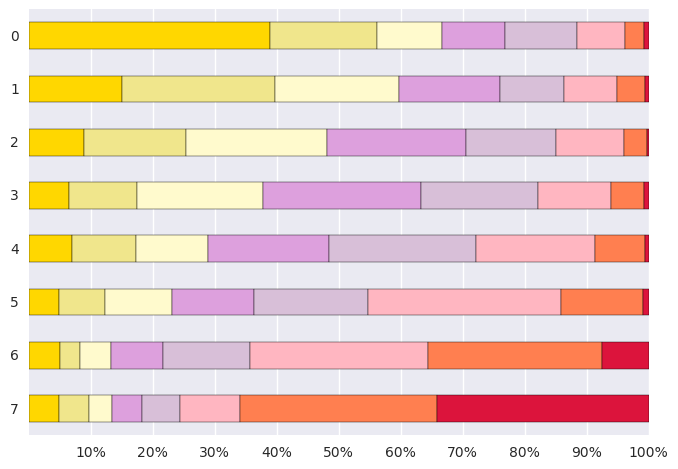

In [153]:
percent_df = pandas.DataFrame(percent)
# buff = np.around(percent, 2)
# buff.shape = N*N
percent_df.plot.barh(stacked=True, color=color, legend=False)
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()

In [46]:
# FIL = np.array([ [False, False, False, False, False, False, False, False],
#                  [False, False, True, True, True, True, True, True],
#                  [False, False, False, True, True, True, True, True],
#                  [False, False, False, False, True, True, True, True],
#                  [False, False, False, False, False, True, True, True],
#                  [False, False, False, False, False, False, False, False],
#                  [False, False, False, False, False, False, False, False],
#                  [False, False, False, False, False, False, False, False] ])
# fil = trend(hoge, N, FIL)
# print 'filter: ', fil
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

plus:  0.35284951024
minus:  0.373107747106
iji:  0.274042742654


In [156]:
FIL = np.array([ [False, False, False, False, False, False, False, False],
                 [False, False, True, True, True, True, True, True],
                 [False, False, False, True, True, True, True, True],
                 [False, False, False, False, True, True, True, True],
                 [False, False, False, False, False, True, True, True],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
pls = trend(hoge, N, FIL)
print 'plus: ', pls
FIL = np.array([ [False, False, False, False, False, False, False, False],
                 [True, False, False, False, False, False, False, False],
                 [True, True, False, False, False, False, False, False],
                 [True, True, True, False, False, False, False, False],
                 [True, True, True, True, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
mns = trend(hoge, N, FIL)
print 'minus: ', mns
FIL = np.array([ [False, False, False, False, False, False, False, False],
                 [False, True, False, False, False, False, False, False],
                 [False, False, True, False, False, False, False, False],
                 [False, False, False, True, False, False, False, False],
                 [False, False, False, False, True, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
iji = trend(hoge, N, FIL)
print 'iji: ', iji

plus:  0.259127337489
minus:  0.202804986643
iji:  0.146927871772


### 晴→雨

In [113]:
# 晴->雨の場合に切り出し
N=8
hoge = np.vstack( [sep_data[:, 5:7],
                  nov_data[:, 0:2],
                  nov_data[:, 6:8]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.4078  0.2039  0.1845  0.0874  0.0583  0.0194  0.0388  0.    ]
 [ 0.2245  0.2857  0.2245  0.102   0.0714  0.0408  0.051   0.    ]
 [ 0.1961  0.2941  0.2255  0.1373  0.0882  0.0392  0.0196  0.    ]
 [ 0.232   0.12    0.136   0.224   0.136   0.08    0.072   0.    ]
 [ 0.144   0.176   0.184   0.176   0.128   0.12    0.064   0.008 ]
 [ 0.0826  0.1193  0.1284  0.156   0.1835  0.2752  0.055   0.    ]
 [ 0.15    0.0875  0.1125  0.1125  0.0875  0.225   0.175   0.05  ]
 [ 0.0476  0.0476  0.0476  0.      0.1429  0.2381  0.2381  0.2381]]


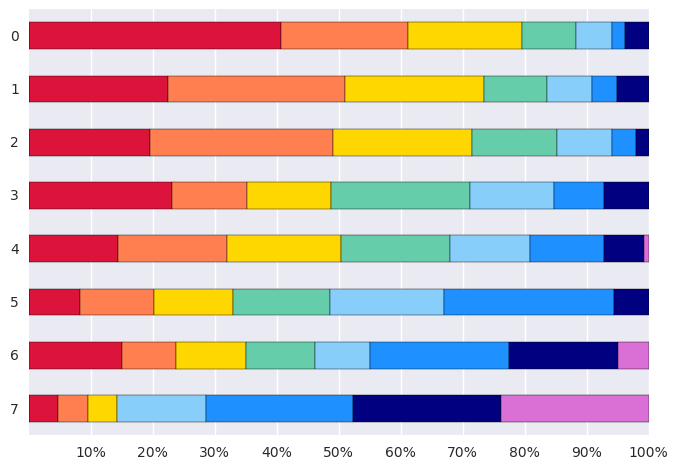

In [114]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()

In [81]:
FIL = np.array([ [False, False, False, False, False, False, False, False],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True] ])
fil = trend(hoge, N, MINUS, SUM)
print 'filter: ', fil
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

filter:  0.82
plus:  0.272608125819
minus:  0.483617300131
iji:  0.24377457405


### 雨→晴

In [136]:
N = 8
# 雨->晴の場合に切り出し
hoge = np.vstack( [sep_data[:, 6:8],
                  nov_data[:, 1:3],
                  nov_data[:, 8:10]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3231  0.1615  0.1308  0.1308  0.1154  0.0846  0.0385  0.0154]
 [ 0.0845  0.2042  0.162   0.1972  0.1479  0.1479  0.0282  0.0282]
 [ 0.0576  0.1655  0.1655  0.1942  0.1511  0.1871  0.0647  0.0144]
 [ 0.0496  0.1405  0.1405  0.2231  0.2066  0.157   0.0661  0.0165]
 [ 0.0215  0.0968  0.1398  0.172   0.2688  0.172   0.1183  0.0108]
 [ 0.0526  0.0211  0.0947  0.1263  0.1368  0.3053  0.2211  0.0421]
 [ 0.      0.0556  0.0278  0.0278  0.1389  0.2222  0.4444  0.0833]
 [ 0.      0.      0.      0.      0.      0.1429  0.4286  0.4286]]


(0.0, 1.0)

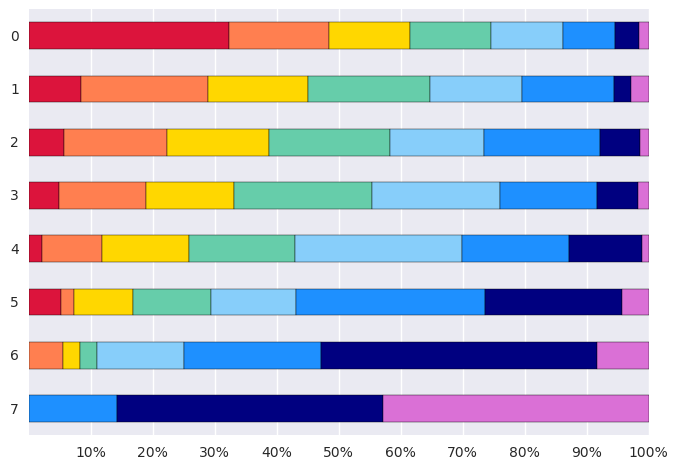

In [137]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()
plt.xlim(0.0, 1.0)

In [79]:
FIL = np.array([ [False, False, False, False, False, False, False, False],
                 [False, False, True, True, True, True, True, True],
                 [False, False, False, True, True, True, True, True],
                 [False, False, False, False, True, True, True, True],
                 [False, False, False, False, False, True, True, True],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
fil = trend(hoge, N, FIL)
print 'filter: ', fil
SUM = np.array([ [False, False, False, False, False, False, False, False],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
fil = trend(hoge, N, FIL, SUM)
print 'filter_only: ', fil
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

filter:  0.35124508519
filter_only:  0.541414141414
plus:  0.503276539974
minus:  0.24246395806
iji:  0.254259501966


### 雨→雨

In [117]:
N = 8
# 雨->雨の場合に切り出し
hoge = np.vstack( [ nov_data[:, 7:9] ] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3133  0.1687  0.1928  0.1325  0.1205  0.0482  0.0241  0.    ]
 [ 0.22    0.18    0.2     0.2     0.12    0.08    0.      0.    ]
 [ 0.15    0.1     0.15    0.275   0.15    0.15    0.025   0.    ]
 [ 0.1622  0.1622  0.1622  0.1622  0.1892  0.1622  0.      0.    ]
 [ 0.1053  0.1842  0.2105  0.0526  0.1053  0.2105  0.1316  0.    ]
 [ 0.0938  0.2188  0.0625  0.125   0.2188  0.2188  0.0625  0.    ]
 [ 0.125   0.2188  0.0938  0.1562  0.125   0.125   0.0938  0.0625]
 [ 0.      0.1667  0.      0.      0.3333  0.      0.3333  0.1667]]


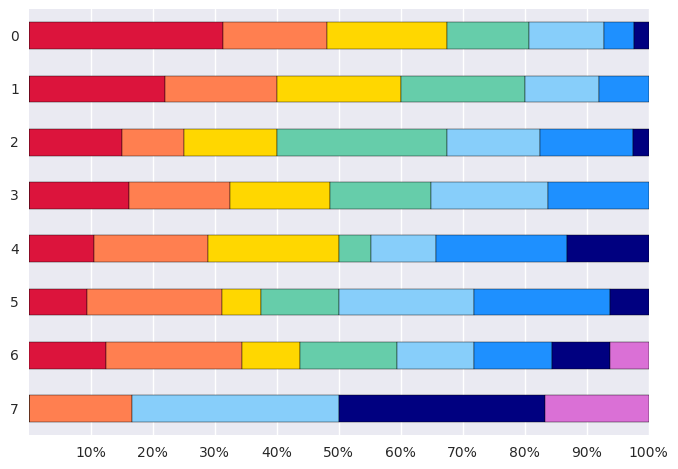

In [118]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()

In [82]:
FIL = np.array([ [False, True, True, True, True, True, True, True],
                 [False, False, True, True, True, True, True, True],
                 [False, False, False, True, True, True, True, True],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
fil = trend(hoge, N, FIL)
print 'filter1-pls: ', fil
SUM = np.array([ [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False] ])
fil = trend(hoge, N, FIL, SUM)
print 'filter_only: ', fil
FIL = np.array([ [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [True, True, True, False, False, False, False, False],
                 [True, True, True, True, False, False, False, False],
                 [True, True, True, True, True, False, False, False],
                 [True, True, True, True, True, True, False, False],
                 [True, True, True, True, True, True, True, False] ])
fil = trend(hoge, N, FIL)
print 'filter2-mns: ', fil
SUM = np.array([ [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [False, False, False, False, False, False, False, False],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True],
                 [True, True, True, True, True, True, True, True] ])
fil = trend(hoge, N, FIL, SUM)
print 'filter_only: ', fil
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

filter1-pls:  0.180865006553
filter_only:  0.455445544554
filter2-mns:  0.389252948886
filter_only:  0.645652173913
plus:  0.272608125819
minus:  0.483617300131
iji:  0.24377457405


# 曜日について解析

In [56]:
# 10日間の平日休日のリスト 平日が0、休日が1
DAY = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1], 
                [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 
                [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]])

### 休→休

In [119]:
N=8
# 休->休の場合に切り出し
hoge = np.vstack( [sep_data[:, 1:3],
                  sep_data[:, 8:],
                  oct_data[:, 4:6],
                  oct_data[:, 5:7],
                  oct_data[:, 6:8],
                  nov_data[:, 7:9]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.335   0.1576  0.1379  0.1084  0.133   0.0887  0.0296  0.0099]
 [ 0.1751  0.2203  0.1751  0.1695  0.1186  0.0847  0.0452  0.0113]
 [ 0.1307  0.1364  0.1875  0.2159  0.142   0.1307  0.0568  0.    ]
 [ 0.0794  0.1323  0.2328  0.1958  0.2011  0.1111  0.0317  0.0159]
 [ 0.1055  0.1256  0.1206  0.1608  0.196   0.1558  0.1256  0.0101]
 [ 0.0676  0.1126  0.1261  0.1171  0.1802  0.2523  0.1351  0.009 ]
 [ 0.0784  0.0784  0.0654  0.098   0.1307  0.2288  0.2614  0.0588]
 [ 0.0667  0.0333  0.      0.0667  0.1667  0.0333  0.3333  0.3   ]]


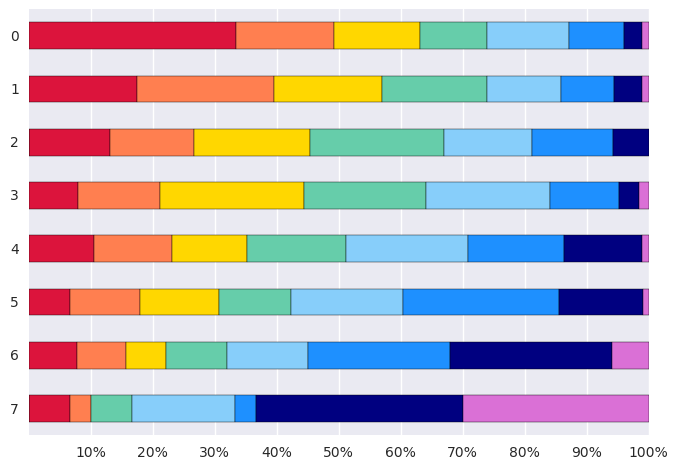

In [120]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()

In [58]:
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

plus:  0.374351371386
minus:  0.387694588584
iji:  0.23795404003


### 休→平

In [138]:
N = 8
# 休->平の場合に切り出し
hoge = np.vstack( [sep_data[:, 2:4],
                  oct_data[:, 7:9],
                  nov_data[:, 0:2],
                  nov_data[:, 2:4],
                  nov_data[:, 7:9]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3249  0.2081  0.1675  0.1066  0.1371  0.0406  0.0102  0.0051]
 [ 0.1411  0.2393  0.2883  0.1472  0.092   0.0675  0.0245  0.    ]
 [ 0.087   0.1925  0.1863  0.2795  0.1242  0.1118  0.0186  0.    ]
 [ 0.09    0.125   0.21    0.28    0.135   0.11    0.05    0.    ]
 [ 0.0773  0.1256  0.1159  0.1932  0.2174  0.2029  0.0676  0.    ]
 [ 0.0685  0.1187  0.1279  0.1553  0.1918  0.2374  0.0913  0.0091]
 [ 0.0818  0.0818  0.1132  0.1006  0.1321  0.2767  0.1698  0.044 ]
 [ 0.0882  0.1176  0.0588  0.0294  0.1471  0.1765  0.2647  0.1176]]


(0.0, 1.0)

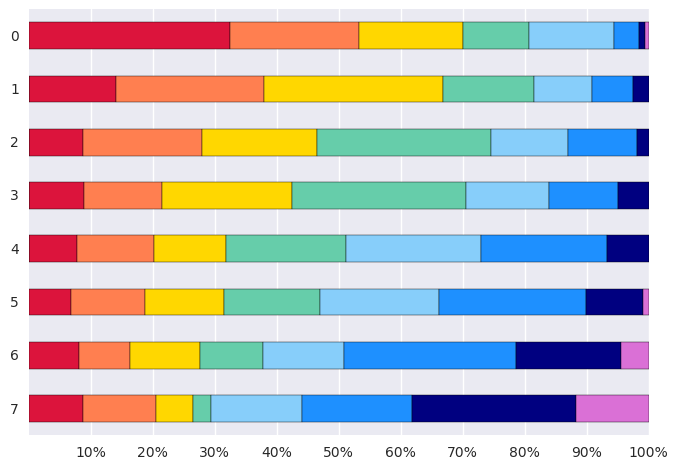

In [139]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()
plt.xlim(0.0, 1.0)

In [60]:
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

plus:  0.346268656716
minus:  0.417164179104
iji:  0.236567164179


### 平→休

In [123]:
N = 8
# 平->休の場合に切り出し
hoge = np.vstack( [sep_data[:, 0:2],
                  sep_data[:, 7:9],
                  oct_data[:, 3:5],
                  nov_data[:, 1:3],
                  nov_data[:, 6:8]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3664  0.145   0.145   0.084   0.1145  0.0611  0.0687  0.0153]
 [ 0.1125  0.1812  0.1312  0.1625  0.1     0.2     0.0875  0.025 ]
 [ 0.1117  0.1675  0.1168  0.1929  0.1574  0.1827  0.0609  0.0102]
 [ 0.1675  0.0985  0.0985  0.1872  0.1872  0.1527  0.1034  0.0049]
 [ 0.0989  0.1319  0.1648  0.1374  0.1593  0.1484  0.1374  0.022 ]
 [ 0.0303  0.0545  0.103   0.1455  0.1515  0.3212  0.1939  0.    ]
 [ 0.1348  0.0449  0.0112  0.0562  0.1685  0.2472  0.2584  0.0787]
 [ 0.      0.      0.0455  0.      0.0455  0.1818  0.4091  0.3182]]


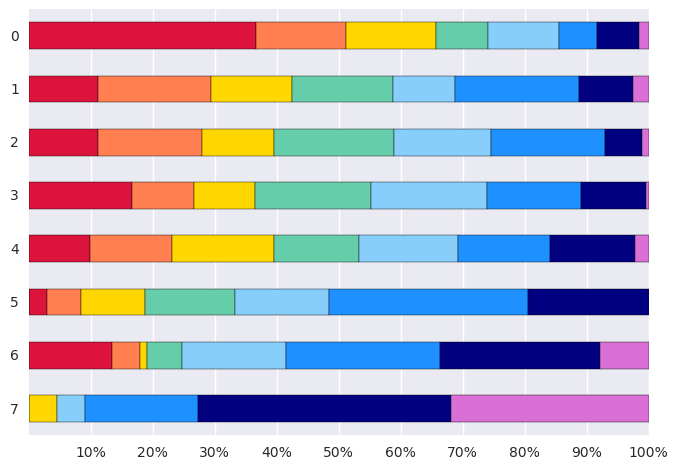

In [124]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()

In [62]:
# FIL = np.array([ [False, False, False, False, False, False, False, False],
#                  [False, False, True, True, True, True, True, True],
#                  [False, False, False, True, True, True, True, True],
#                  [False, False, False, False, True, True, True, True],
#                  [False, False, False, False, False, True, True, True],
#                  [False, False, False, False, False, False, False, False],
#                  [False, False, False, False, False, False, False, False],
#                  [False, False, False, False, False, False, False, False] ])
# fil = trend(hoge, N, FIL)
# print 'filter: ', fil
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

plus:  0.436031331593
minus:  0.346388163621
iji:  0.217580504787


### 平→平

In [125]:
N = 8
# 平->平の場合に切り出し
hoge = np.vstack( [sep_data[:, 3:5],
                  sep_data[:, 4:6],
                  sep_data[:, 5:7],
                  sep_data[:, 6:8],
                  oct_data[:, 0:2],
                  oct_data[:, 1:3],
                  oct_data[:, 2:4],
                  oct_data[:, 7:9],
                  oct_data[:, 8:],
                  nov_data[:, 3:5],
                  nov_data[:, 4:6],
                  nov_data[:, 8:]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.4098  0.2033  0.1148  0.1148  0.0852  0.0525  0.0197  0.    ]
 [ 0.1749  0.2924  0.2037  0.1462  0.107   0.0601  0.0157  0.    ]
 [ 0.0801  0.1808  0.2654  0.2197  0.1373  0.0847  0.0275  0.0046]
 [ 0.0578  0.1071  0.2184  0.2719  0.1884  0.1221  0.0321  0.0021]
 [ 0.048   0.0981  0.1211  0.2109  0.2547  0.2109  0.0564  0.    ]
 [ 0.044   0.0615  0.0813  0.1275  0.1868  0.3692  0.1143  0.0154]
 [ 0.0258  0.0361  0.0464  0.0773  0.1237  0.2938  0.3093  0.0876]
 [ 0.      0.0541  0.027   0.027   0.027   0.1081  0.2973  0.4595]]


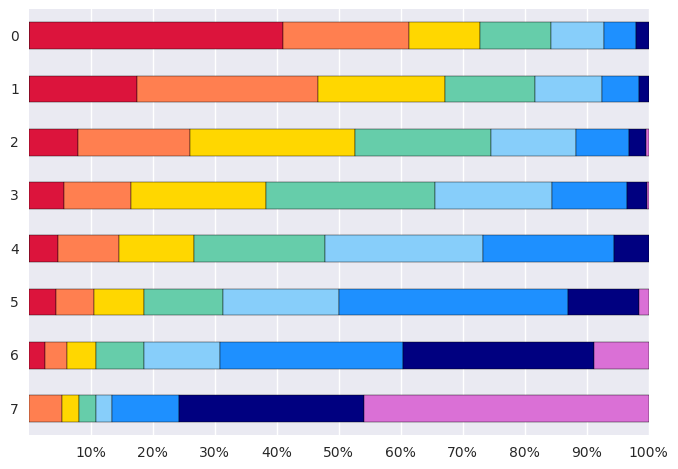

In [126]:
percent_df = pandas.DataFrame(percent)
percent_df.plot.barh(stacked=True, color=color, legend=False);
# percent_df.plot.barh(stacked=True, color=color)
plt.xticks( [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] )
plt.gca().invert_yaxis()

In [64]:
# FIL = np.array([ [False, False, False, False, False, False, False, False],
#                  [False, False, True, True, True, True, True, True],
#                  [False, False, False, True, True, True, True, True],
#                  [False, False, False, False, True, True, True, True],
#                  [False, False, False, False, False, True, True, True],
#                  [False, False, False, False, False, False, False, False],
#                  [False, False, False, False, False, False, False, False],
#                  [False, False, False, False, False, False, False, False] ])
# fil = trend(hoge, N, FIL)
# print 'filter: ', fil
pls = trend(hoge, N, PLUS)
print 'plus: ', pls
mns = trend(hoge, N, MINUS)
print 'minus: ', mns
iji = trend(hoge, N, IJI)
print 'iji: ', iji

plus:  0.346753717809
minus:  0.346028291621
iji:  0.307217990569
